# Chapter 07 문서 업무 자동화

## 7.1 엑셀 업무 자동화

### openpyxl 개요

In [1]:
!pip install openpyxl

### 엑셀 파일과 시트 다루기

In [2]:
# 엑셀 파일 생성 및 저장하기
from openpyxl import Workbook		# Workbook 모듈(클래스) 불러오기
wb = Workbook()						# wb 객체 생성
ws = wb.active						# ws 객체 생성
ws.title = "시트1"					# ws 시트의 시트명 변경
ws.append(["이름", "나이", "성별"])		# ws 시트의 첫 번째 행부터 차례로 내용 추가
ws.append(["이순신", "55", "남자"])		# 두 번째 행에 추가
wb.save(filename = "테스트.xlsx")		# workbook 저장

In [3]:
# 엑셀 파일을 불러와 내용 수정 후 저장하기
from openpyxl import load_workbook			# Workbook 모듈과 load_workbook 불러오기
wb = load_workbook(filename = "테스트.xlsx")  	# "테스트.xlsx" 파일을 불러오기
ws = wb.active								# ws 활성화
ws.append(["홍길동", "40", "남자"])			# 행 추가
wb.save(filename = "테스트.xlsx")			# wb를 "테스트.xlsx" 파일로 저장

In [4]:
from openpyxl import Workbook			# Workbook 모듈(클래스) 불러오기
wb = Workbook()							# wb 객체 생성, wb에 시트 하나가 기본 추가됨
wb.create_sheet("시트2")					# wb에 "시트2" 시트 추가
wb.create_sheet("시트3")					# wb에 "시트3" 시트 추가

<Worksheet "시트3">

In [5]:
print(wb.sheetnames) # wb 객체에 있는 시트 정보 출력

['Sheet', '시트2', '시트3']


In [6]:
ws = wb["시트2"]				# wb 객체에 있는 “시트2”를 선택

In [7]:
ws.append(["첫 번째로 추가된 시트입니다."])				# 선택된 시트에 내용 추가
wb["시트3"].append(["세 번째 시트에 내용을 추가합니다."])	# 시트를 직접 지정해서 내용 추가

In [8]:
wb.save(filename = "샘플_시트 추가.xlsx") # 파일 저장

In [9]:
# 시트 복사하기
from openpyxl import load_workbook		# Workbook 모듈과 load_workbook 불러오기
wb = load_workbook("테스트.xlsx")			# "테스트.xlsx" 파일을 불러와 wb 객체에 저장
wb.copy_worksheet(wb["시트1"])			# "시트1"을 복사하여 wb 객체에 저장
wb.active = wb["시트1 Copy"]				# 파일을 열 때 “시트1 Copy”를 활성화 
wb.save(filename = "샘플_시트 복사.xlsx")		# 파일 저장

In [10]:
# 시트 이름 바꾸기
from openpyxl import load_workbook		# Workbook 모듈과 load_workbook 불러오기
wb = load_workbook("샘플_시트 복사.xlsx")	# "샘플_시트 복사.xlsx" 파일 불러오기
print(wb.sheetnames)					# 시트명 출력

wb["시트1 Copy"].title = "시트1 복사"		# "시트1 Copy" 시트명을 "시트1 복사"로 변경
wb.save(filename = "샘플_시트 복사.xlsx")		# 파일 저장
print(wb.sheetnames)					# 시트명 출력

['시트1', '시트1 Copy']
['시트1', '시트1 복사']


In [11]:
# 시트 순서 변경하기
from openpyxl import load_workbook		# Workbook 모듈과 load_workbook 불러오기
wb = load_workbook("샘플_시트 복사.xlsx")	# "샘플_시트 복사.xlsx" 파일 불러오기
print(wb.sheetnames)					# 시트명 출력

wb.move_sheet(wb["시트1 복사"], -1)		# “시트1 복사” 시트를 왼쪽으로 이동 
wb.save(filename = "샘플_시트 순서 변경.xlsx")	# 파일 저장
print(wb.sheetnames)					# 시트명 출력

['시트1', '시트1 복사']
['시트1 복사', '시트1']


In [12]:
# 시트 삭제하기
from openpyxl import load_workbook			# Workbook 모듈과 load_workbook 불러오기
wb = load_workbook("샘플_시트 순서 변경.xlsx") 	# "샘플_시트 순서 변경.xlsx" 파일 불러오기
print(wb.sheetnames)						# 시트명 출력

wb.remove(wb["시트1 복사"])					# "시트1 복사" 시트 삭제하기
wb.save(filename = "샘플_시트 삭제.xlsx")		# 파일 저장
print(wb.sheetnames)

['시트1 복사', '시트1']
['시트1']


### 셀 내용 다루기

In [13]:
# 셀의 내용 확인하기
from openpyxl import load_workbook		# Workbook 모듈과 load_workbook 불러오기
wb = load_workbook("테스트.xlsx")		# "테스트.xlsx" 파일을 불러와 wb 객체에 저장
ws = wb["시트1"]						# 시트 선택
print(ws["A1"].value)				# [A1] 셀의 값을 출력
print(ws[1][0].value) 				# 1행 0열의 값 출력

이름
이름


In [14]:
# 반복문을 통해 셀 정보에 접근하기
from openpyxl import load_workbook		# Workbook 모듈과 load_workbook 불러오기
wb = load_workbook("테스트.xlsx")			# "테스트.xlsx" 파일을 불러와 wb 객체에 저장
ws = wb["시트1"]							# 시트 선택

for row in ws: 		 # 반복문을 활용하여 ws 객체에 데이터가 있는 행을 차례로 불러옴 
    print(row)		 # 행의 속성을 출력

(<Cell '시트1'.A1>, <Cell '시트1'.B1>, <Cell '시트1'.C1>)
(<Cell '시트1'.A2>, <Cell '시트1'.B2>, <Cell '시트1'.C2>)
(<Cell '시트1'.A3>, <Cell '시트1'.B3>, <Cell '시트1'.C3>)


In [15]:
for row in ws: 			# 반복문을 활용하여 ws 객체에 데이터가 있는 행을 차례로 읽어 옴 
    for cell in row:	 # 반복문을 활용하여 변수 row에 있는 속성과 값을 읽어 cell에 저장
        print("셀 객체명 : {}, 셀 값 : {}".format(cell, cell.value))  # cell의 속성과 값을 출력

셀 객체명 : <Cell '시트1'.A1>, 셀 값 : 이름
셀 객체명 : <Cell '시트1'.B1>, 셀 값 : 나이
셀 객체명 : <Cell '시트1'.C1>, 셀 값 : 성별
셀 객체명 : <Cell '시트1'.A2>, 셀 값 : 이순신
셀 객체명 : <Cell '시트1'.B2>, 셀 값 : 55
셀 객체명 : <Cell '시트1'.C2>, 셀 값 : 남자
셀 객체명 : <Cell '시트1'.A3>, 셀 값 : 홍길동
셀 객체명 : <Cell '시트1'.B3>, 셀 값 : 40
셀 객체명 : <Cell '시트1'.C3>, 셀 값 : 남자


In [16]:
# 셀 내용 수정하기
from openpyxl import load_workbook		# Workbook모듈과 load_workbook 불러오기
wb = load_workbook("테스트.xlsx")			# "테스트.xlsx" 파일을 불러와 wb 객체에 저장
ws = wb["시트1"]							# 시트 선택

ws["A1"] = "성명"							# [A1] 셀의 내용을 "이름"에서 "성명"으로 변경 
wb.save(filename = "테스트_셀 내용 변경.xlsx") 	# 파일 저장

In [17]:
# 반복문을 통해 셀 정보에 순차적으로 접근, 값 변경하기
from openpyxl import load_workbook			# Workbook 모듈과 load_workbook 불러오기
wb = load_workbook("테스트.xlsx")			# "테스트.xlsx" 파일을 불러와 wb 객체에 저장
ws = wb["시트1"]							# 시트 선택
new_data = ["신사임당", "45", "여자"] 		# 변경할 데이터를 리스트로 생성

row_no = 1						# 행 번호를 저장할 변수 설정
for row in ws:					# ws의 행을 하나씩 읽어 옴
    if row_no == 2: 				# row_no가 2일 때(2행) 아래 코드 실행
        for cell in row:			# 행의 각 셀에 접근
            cell.value = new_data[cell.col_idx-1]	# 셀 값 변경
    row_no += 1						# row_no 증가
wb.save(filename = "테스트_셀 내용 변경(반복문).xlsx")		# 파일 저장 

In [18]:
# 셀에 내용 입력하기
from openpyxl import load_workbook		# Workbook 모듈과 load_workbook 불러오기
wb = load_workbook("테스트.xlsx")		# "테스트.xlsx" 파일을 불러와 wb 객체에 저장
ws = wb["시트1"]						# 시트 선택

ws["A4"] = "신사임당" 					# 셀에 직접 데이터 입력
ws["B4"] = "45"	
ws["C4"] = "여자"

ws.append(["을지문덕", "60", "남자"])		# 다음 행에 데이터 입력

new_data_list = [["유관순", "16", "여자"], ["세종대왕", "60", "남자"]]		# 리스트 생성

for new_data in new_data_list:			# 반복문을 활용해 데이터 입력
    ws.append(new_data)

wb.save(filename = "테스트_셀 내용 입력.xlsx")	# 파일 저장

** 행/열 삭제하기 주석 수정

    기존 : 3행 부터 1행만 삭제
    수정 : 두 번째 행(2행)부터 1행만 삭제

In [19]:
# 행/열 삭제하기
from openpyxl import load_workbook		# Workbook 모듈과 load_workbook 불러오기
wb = load_workbook("테스트.xlsx")		# "테스트.xlsx" 파일을 불러와 wb 객체에 저장
ws = wb["시트1"]						# 시트 선택

ws.delete_rows(idx = 2, amount = 1)		# 3행부터 1행만 삭제 
ws.delete_cols(idx = 2, amount = 2)		# 두 번째 열(B열)부터 2열 삭제 

wb.save(filename = "테스트_행과 열 삭제.xlsx")		# 파일 저장

In [20]:
# 셀 복사하기
from openpyxl import load_workbook		# Workbook 모듈과 load_workbook 불러오기
wb = load_workbook("테스트.xlsx")			# "테스트.xlsx" 파일을 불러와 wb 객체에 저장
ws = wb["시트1"]							# 시트 선택

src = ws["A2"].value				# [A2] 셀 값을 변수 src에 저장
ws["A5"] = src						# [A5] 셀에 [A2] 셀 값을 복사

for row in ws["A6:C6"]:				# [A6:C6] 범위를 선택해 반복문 실행
    for cell in row:				# 행의 각 셀에 접근
        cell.value = src			# 행의 각 셀을 src 변수 값으로 변경

wb.save(filename = "테스트_셀 복사1.xlsx")	# 파일 저장

In [21]:
from openpyxl import load_workbook		# Workbook 모듈과 load_workbook 불러오기
wb = load_workbook("테스트.xlsx")		# "테스트.xlsx" 파일을 불러와 wb 객체에 저장
ws = wb["시트1"]						# 시트 선택

src_data = []						# 복사할 값을 저장할 변수 선언
for cell in ws[2]:					# 원본이 될 2행에 접근
    src_data.append(cell.value)		# 2행의 셀 값들을 src_data 변수에 저장

for row in ws["A5:C5"]:				# [A2:C3] 범위를 선택해 반복문 실행
    for cell in row:				# 행의 각 셀에 접근
        cell.value = src_data[cell.col_idx-1]	# 셀의 값을 src 변수 값으로 변경    
    
wb.save(filename = "테스트_셀 복사2.xlsx")		# 파일 저장

In [22]:
# 셀 내용 이동하기
from openpyxl import load_workbook		# Workbook 모듈과 load_workbook 불러오기
wb = load_workbook("테스트.xlsx")		# "테스트.xlsx" 파일을 불러와 wb 객체에 저장
ws = wb["시트1"]						# 시트 선택

# [B1:C3] 영역에 있는 데이터를 아래로 한 칸, 오른쪽으로 2칸 이동
ws.move_range("B1:C3", rows = 1, cols = 2) 		# 음수값을 사용해 위나 왼쪽으로도 이동 가능
wb.save(filename = "테스트_셀 이동.xlsx")			# 파일 저장

In [23]:
# 셀 병합 및 해제하기
from openpyxl import load_workbook		# Workbook 모듈과 load_workbook 불러오기
wb = load_workbook("테스트.xlsx")		# "테스트.xlsx" 파일을 불러와 wb 객체에 저장
ws = wb["시트1"]						# 시트 선택

ws.merge_cells("A1:B1")				# [A1], [B1] 셀 병합
ws.merge_cells("A2:B2")				# [A2], [B2] 셀 병합

ws.unmerge_cells("A2:B2")			# [A2], [B2] 셀 병합 해제
wb.save(filename = "테스트_셀 병합.xlsx")		# 파일 저장
# [A1:B1] 셀은 병합되어 [A1] 셀 값만 보이게 되고, [A2:B2] 셀은 병합 후 다시 병합 해제하여 [A2] 셀 값만 보이게 됩니다. 

In [24]:
# 텍스트 형식을 숫자 형식으로 바꾸고 엑셀 함수로 연산하기
from openpyxl import load_workbook		# Workbook 모듈과 load_workbook 불러오기
wb = load_workbook("테스트.xlsx")		# "테스트.xlsx" 파일을 불러와 wb 객체에 저장
ws = wb["시트1"]						# 시트 선택

ws["B2"].data_type = "i" 			# B2 셀을 정수형으로 변환
ws["B3"].data_type = "i" 			# B3 셀을 정수형으로 변환 
ws["A4"] = "나이 합계"					# A4 셀에 데이터 입력
ws["B4"] = "=sum(B2:B3)"			# B4 셀에 sum 함수 입력
wb.save(filename = "테스트_셀 연산.xlsx")

### 셀 서식 다루기

In [25]:
# 셀 배경과 폰트 서식 변경하기
from openpyxl import load_workbook		# Workbook 모듈과 load_workbook 불러오기
from openpyxl.styles import Font, PatternFill	# 폰트와 배경 설정 클래스 불러오기

wb = load_workbook("테스트.xlsx")		# "테스트.xlsx" 파일을 불러와 wb 객체에 저장
ws = wb["시트1"]						# 시트 선택

# 항목 부분 [A1:C1]의 배경을 검은색, 폰트 크기 12, 볼드체, 글자색 흰색으로 변경
# 색 정보는 aRGB HEX 코드로 지정하면 됨
fill_style = PatternFill(fill_type = "solid", start_color = "000000") 	# 셀 배경 설정
font_style = Font(color = "FFFFFF", sz = 12, bold = True) 				#폰트 설정

for row in ws:						# ws의 행을 하나씩 읽어 옴
    for cell in row:				# 행의 각 셀에 접근
        if cell.row == 1:			# 셀 행이 1일 때 True가 되어 속성 변경 가능
            cell.fill = fill_style		# 셀의 배경 속성을 fill_style로 설정  
            cell.font = font_style		# 셀의 폰트 속성을 font_style로 설정
wb.save(filename = "테스트_배경 서식 변경.xlsx")

In [26]:
# 셀 높이와 너비 조정하기
from openpyxl import load_workbook			# 모듈 불러오기
wb = load_workbook("테스트_배경 서식 변경.xlsx")	# 파일 불러와 wb 객체에 저장
ws = wb["시트1"]								# 시트 선택

# 1~5행의 높이를 24, A열의 너비를 14로 변경
for i in range(1, 6):
    ws.row_dimensions[i].height = 24 	# row_dimensions[숫자] → i행 전체를 선택
ws.column_dimensions["A"].width = 14 	# column_dimensions["A"] → A열 전체를 선택
wb.save(filename = "테스트_너비와 높이 조정.xlsx")

In [27]:
# 텍스트 정렬하기
from openpyxl import load_workbook			# 모듈 불러오기
from openpyxl.styles import Alignment		# 텍스트 정렬 모듈 불러오기

wb = load_workbook("테스트_너비와 높이 조정.xlsx")	# 파일 불러와서 wb 객체에 저장
ws = wb["시트1"]									# 시트 선택

# 가로와 세로 정렬값을 중앙으로 변경하는 객체 생성
alignment_style = Alignment(horizontal = "center", vertical = "center")

for row in ws:									# ws의 행을 하나씩 읽어 옴
    for cell in row:							# 행의 각 셀에 접근
        cell.alignment = alignment_style		# 셀의 정렬 속성을 설정

wb.save(filename = "테스트_텍스트 정렬.xlsx")		# 파일 저장

In [28]:
# 셀 테두리 서식 변경하기
from openpyxl import load_workbook				# 모듈 불러오기
from openpyxl.styles import Side, Border		# 테두리 설정 모듈 불러오기
wb = load_workbook("테스트_텍스트 정렬.xlsx")		# 파일 불러와서 wb 객체에 저장
ws = wb["시트1"]									# 시트 선택
side_style = Side(style = "medium", color = "000000")	# 테두리를 중간 굵기, 검은색으로 설정

# 위 서식(side_style)을 적용할 테두리 영역을 설정 후 border_styles 객체로 저장
border_styles = Border(
    left = side_style,
    right = side_style,
    top = side_style,
    bottom = side_style
)

for row in ws:								# ws의 행을 하나씩 읽어 옴
    for cell in row:						# 행의 각 셀에 접근
        cell.border = border_styles			# 셀의 테두리 속성을 설정
wb.save(filename = "테스트_셀 테두리 변경.xlsx")	# 파일 저장

### [실습] 유통매장의 고객만족도 분석하기

In [29]:
# 01. 엑셀 파일 불러오기
from openpyxl import load_workbook			#  Workbook 모듈과 load_workbook 불러오기
wb = load_workbook("고객 만족 데이터.xlsx") 	# 파일을 불러와 wb 객체로 저장
ws = wb["Sheet1"] 							# 시트 선택

** 데이터 변환하기 범위 수정

   고객 만족 데이터.xlsx 내에서 순번(No.)를 제외하고 숫자 형식으로 변경해야하는 부분은 [B2:F14] 이다.
   
   따라서 코드와 원고 내 범위 수정이 필요하다. (원고 p.208 [A2:F13])

     기존 : 반복문을 활용해 [A2:F14] 범위의 설문 응답 데이터만 숫자 형식으로 변경
     수정 : 반복문을 활용해 [B2:F14] 범위의 설문 응답 데이터만 숫자 형식으로 변경

     기존 : if cell.col_idx > 1 and cell.col_idx < 7 and cell.row > 1: # [A2:F13] 선택
     수정 : if cell.col_idx > 1 and cell.col_idx < 7 and cell.row > 1: # [B2:F14] 선택
  

In [30]:
# 02. 데이터 변환하기  - 반복문을 활용해 [B2:F14] 범위의 설문 응답 데이터만 숫자 형식으로 변경
for row in ws:							# ws의 행을 하나씩 읽어 옴
    for cell in row:					# 행의 각 셀에 접근
        if cell.col_idx > 1 and cell.col_idx < 7 and cell.row > 1:		# [B2:F14] 선택
            cell.data_type = "i"		# 셀 유형을 정수형으로 변환

In [31]:
# 03. 데이터 요약하기
this_max_row = ws.max_row						# 마지막 행 번호 구하기
ws["A{}".format(this_max_row+1)] = "평균/합계"		# 마지막 다음 행에 값 입력

for col_let in ["B", "C", "D"]:					# B, C, D열 반복
    average_formula = "=AVERAGE({}2:{}{})".format(col_let, col_let, this_max_row)
    ws["{}{}".format(col_let, this_max_row+1)] = average_formula
    ws["{}{}".format(col_let, this_max_row+1)].number_format = "#.##"

for col_let in ["E", "F"]:						# E, F열의 합계 구하기
    sum_formula = "=SUM({}2:{}{})".format(col_let, col_let, this_max_row)
    ws["{}{}".format(col_let, this_max_row+1)] = sum_formula

** 주석 내용 코드 추가

    wb.save("고객 만족 데이터_중간저장.xlsx") 코드 추가하여 저장할 수 있게 변경

In [32]:
# 04.요약표 작성하기
wb.create_sheet("보고서 삽입용 요약표") 		# 요약표가 들어갈 시트 생성
ws = wb["보고서 삽입용 요약표"] 				# 시트 선택

# 요약표에 들어갈 내용을 리스트로 미리 지정 
summary_table_form = [
    ["성별 분포", "남성", "여성"],
    ["인원", "", ""],
    ["비율", "", ""],
    ["", "", ""],
    ["연령 분포", "20대", "30대", "40대", "50대 이상"],
    ["인원", "", ""],
    ["비율", "", ""],
    ["", "", ""],
    ["조사 결과"],
    ["제품 만족도"],
    ["재구매 의사"],
    ["추천 의향"],
    ["방문 횟수"],
    ["클레임 횟수"]
]

# 리스트 데이터를를 하나씩 읽어와 append() 함수를 통해 내용 입력
for form_row in summary_table_form:
    ws.append(form_row)

# wb.save("고객 만족 데이터_중간저장.xlsx")
# 주석 코드를 실행하면, 중간 결과를 저장하여 아래와 같이 보고서 삽입용 요약표 시트가 생성된 것을 볼 수 있습니다. 

In [33]:
# 남/녀 인원수와 비율
for gender in [["B", "남"], ["C", "여"]]:
    ws[gender[0]+"2"] = "=COUNTIF(Sheet1!H2:H{}, \"{}\")".format(ws.max_row, gender[1])
    ws[gender[0]+"3"] = "={}2/SUM(B2:C2)".format(gender[0])
    ws[gender[0]+"3"].number_format = "0.00%"

# 연령대별 인원수와 비율 
for age in [["B", "20대"], ["C", "30대"], ["D", "40대"], ["E", "50대 이상"]]:
    ws[age[0]+"6"] = "=COUNTIF(Sheet1!G2:G{}, \"{}\")".format(ws.max_row, age[1])
    ws[age[0]+"7"] = "={}6/SUM(B6:E6)".format(age[0])
    ws[age[0]+"7"].number_format = "0.00%"

# 항목별 평균, 합계 요약
row_no = 10
for alphabet in ["B", "C", "D", "E", "F"]:
    ws["B"+str(row_no)] = "=Sheet1!{}{}".format(alphabet, ws.max_row+1)
    if row_no < 13:
        ws["B"+str(row_no)].number_format = "#.##"
    row_no += 1
# 위 코드를 실행하면 보고서 삽입용 요약표 양식에 요약된 값들이 아래 그림처럼 삽입됩니다.

In [34]:
# 05. 서식 설정하기
ws.column_dimensions["A"].width = 15			# A열의 너비는 15로 설정
for alphabet in ["B", "C", "D", "E"]:
    ws.column_dimensions[alphabet].width = 10 	# 나머지 열의 너비는 10으로 설정

for i in range(len(summary_table_form)+1):		# 모든 행의 높이를 25로 설정
    ws.row_dimensions[i].height = 25

In [35]:
from openpyxl.styles import Alignment, Side, Border, Font, PatternFill, Color

alignment_style = Alignment(horizontal= "center", vertical = "center") # 텍스트 정렬 서식 지정
side = Side(color="CCCCCC", border_style="medium")	# 테두리 서식 지정
border_style = Border(								# border_style 객체 생성
    left = side,
    right = side,
    top = side,
    bottom = side,
)

# 표가 있는 부분에만 폰트와 테두리 서식 적용
style_apply_cells = ["A1:C3", "A5:E7", "A9:B14"] 
for cell_area in style_apply_cells:					# 셀 영역을 차례로 읽어 옴
    for row in ws[cell_area]:						# 셀 영역의 각 행을 차례로 읽어 옴
        for cell in row:							# 행의 각 셀에 접근
            cell.alignment = alignment_style		# 텍스트 서식 설정
            cell.border = border_style				# 테두리 서식 설정

In [36]:
header_font_style = Font(sz = 12, bold = True) 	# 표의 헤더 부분은 볼드로 처리
header_background_style = PatternFill(fill_type = "solid", start_color = "ffd663") # 음영 처리
style_apply_cells_for_header = ["A1:C1", "A5:E5", "A9:B9"] # 서식이 적용될 헤더 부분의 영역 설정

for cell_area in style_apply_cells_for_header:		# 셀 영역을 차례로 읽어 옴
    for row in ws[cell_area]:						# 셀 영역의 각 행을 차례로 읽어 옴
        for cell in row:							# 행의 각 셀에 접근
            cell.font = header_font_style			# 셀 폰트 서식 설정
            cell.fill = header_background_style		# 셀 배경 서식 설정

ws.merge_cells("A9:B9")								# ’조사 결과’ 셀 병합

In [37]:
wb.active = ws
wb.save("고객 만족 데이터_보고2.xlsx")

### [실습] 여러 개의 엑셀 파일을 하나로 합치기

In [38]:
# 01. 모듈 불러오기
from copy import copy		 # 셀의 값과 서식을 복사하기 위해 copy 모듈 불러오기
from openpyxl import Workbook
from openpyxl import load_workbook

In [39]:
# 02. 사용자 함수 정의하기
def copy_ws(ws_src, wb_dst, new_sheet_name):  
    wb_dst.create_sheet(new_sheet_name) 	# 통합 엑셀 파일에 워크시트 하나를 추가
    new_sheet = wb_dst[new_sheet_name] 		# 통합 엑셀 파일에 추가한 워크시트를 선택
    for row in ws_src: 						# ws의 행을 하나씩 읽어 옴
        for cell in row: 					# 행의 각 셀에 접근
            new_cell = new_sheet[cell.coordinate] # 접근한 셀의 좌표를 new_cell 변수에 저장
            
            # 현재 접근한 셀의 내용과 서식을 복사하여 통합 파일의 new_sheet 셀에 붙여넣기
            new_cell.value = cell.value							# 셀 값
            new_cell.font = copy(cell.font)						# 폰트
            new_cell.border = copy(cell.border)					# 테두리
            new_cell.fill = copy(cell.fill)						# 배경
            new_cell.number_format = copy(cell.number_format)	# 셀 값 포멧
            new_cell.protection = copy(cell.protection)			# 보호셀 
            new_cell.alignment = copy(cell.alignment)			# 정렬
    
    if ws_src.merged_cells: #원본 워크시트에 병합된 셀이 있다면 대상 워크시트에도 반영
        new_sheet.merge_cells(str(ws_src.merged_cells))

In [40]:
# 03. 통합 실행하기
wb_dst = Workbook() # 엑셀 파일을 통합할 워크북(통합 파일) 생성
src_file_list = ["시트복사_원본1.xlsx", "시트복사_원본2.xlsx"]   #원본 파일들을 리스트로 생성

for src_file in src_file_list: 				# 반복문을 통해 원본 파일들에 접근
    wb_src = load_workbook(src_file) 		# 원본 파일의 워크북을 객체로 로드
    for ws_src in wb_src.worksheets: 		# 반복문을 통해 원본 파일의 워크시트에 접근
        new_sheet_name = src_file.split(".xlsx")[0] + "_" + ws_src.title  # 통합 파일 시트명 생성
        copy_ws(ws_src, wb_dst, new_sheet_name)		# 통합 파일에 원본시트 복사

wb_dst.remove(wb_dst["Sheet"])		# 통합 워크북 객체 생성 시 자동 생성되는 워크시트는 삭제
wb_dst.save("통합.xlsx")				# 병합이 끝난 대상 워크북 객체를 엑셀 파일로 저장
# "통합.xlsx" 파일을 열어보면 다음과 같이 두 개의 시트 결과를 확인할 수 있습니다. 

## 7.2  파워포인트 업무 자동화

### python-pptx 개요

In [41]:
!pip install python-pptx

### 파워포인트 파일 다루기

In [42]:
# 파워포인트 파일 생성하고 저장하기
from pptx import Presentation		# Presentation 클래스 불러오기

In [43]:
prs = Presentation() 			# 파워포인트 객체 생성
prs.save ("샘플.pptx") 			# 파워포인트 파일로 저장
# "샘플.pptx"를 열어보면 아래 화면처럼 빈 슬라이드가 생성된 것을 확인할 수 있습니다.

In [44]:
# 파워포인트 파일 구조 파악하기
from pptx import Presentation				# Presentation 클래스 불러오기
prs = Presentation("사내 어린이집 원아모집.pptx")	# 파일을 불러와 파워포인트 객체 생성

slide1 = prs.slides[0]						# prs 객체의 0번 슬라이드를 slide1에 저장
for shape in slide1.shapes:					# slide1.shapes를 하나씩 불러오기
    print(shape.shape_type)
# 오른쪽 이미지는 “사내 어린이집 원아모집.pptx” 파일의 첫 번째 슬라이드입니다.

AUTO_SHAPE (1)
PICTURE (13)
TEXT_BOX (17)
AUTO_SHAPE (1)
TABLE (19)
AUTO_SHAPE (1)
AUTO_SHAPE (1)
AUTO_SHAPE (1)
AUTO_SHAPE (1)
AUTO_SHAPE (1)
GROUP (6)
GROUP (6)
AUTO_SHAPE (1)
AUTO_SHAPE (1)
AUTO_SHAPE (1)
AUTO_SHAPE (1)
AUTO_SHAPE (1)


In [45]:
# 도형과 글상자에 있는 텍스트 출력하기
from pptx import Presentation				# Presentation 클래스 불러오기
prs = Presentation("사내 어린이집 원아모집.pptx") # 파일을 불러와 파워포인트 객체 생성

slide1 = prs.slides[0]						# prs 객체의 0번 슬라이드를 slide1에 저장
for shape in slide1.shapes:					# slide1.shapes를 하나씩 불러오기
    if shape.shape_type == 1 or shape.shape_type == 17:  # shape_type이 1 또는 17일 경우
        print(shape.text)					# 텍스트 출력

사내 어린이집 원아모집 (안내)
직장 어린이집 원아모집 관련 내용을 안내드리오니
자녀분의 입소를 희망하시는 직원분께서는 신청해주시기 바랍니다.
1. 모집 대상 : 만 1세 ~ 만 5세의 영유아가 있는 직원
- 연령별 원아모집 결과에 따라 반별 인원은 조정 가능, 결원 시 수시모집
 
2. 모집 인원 (변동 가능)
3. 신청방법 

바른
어린이집
신청 : 어린이집 홈페이지 신청
서류 제출 : 직접 우편접수 (첨부1 서류목록 및 제출처 주소지 참조)
접수 일정 : ~11.6(금) 18시까지 온라인 접수  *20.11.13(금) 오후 2시 발표 예정
신청 : 어린이집 홈페이지 신청
서류 제출 : 이메일 제출* 메일 제목 : 신청자 이름/아동 이름(생년월일)/서류제출명
접수 일정 : ~11.6(금) 18시까지 온라인 접수  *20.11.13(금) 오후 2시 발표 예정
신청 : 담당자 이메일 신청* 자녀 성명/생년/모집구분 기재 必 (가족관계증명서 必)
접수 일정 : ~11.6(금) 18시까지 메일 접수 *20.11.13(금) 오후 2시 발표 예정
※ 첨부 : 어린이집 제출서류 상세 (안내)
【마침】


In [46]:
# 텍스트 수정하기
from pptx import Presentation				# Presentation 클래스 불러오기
prs = Presentation("사내 어린이집 원아모집.pptx") # 파일을 불러와 파워포인트 객체 생성

slide1 = prs.slides[0]						# prs 객체의 0번 슬라이드를 slide1에 저장
for shape in slide1.shapes:					# slide1.shapes를 하나씩 불러오기

    # 제목 도형인지 체크하기 위한 필터링
    if shape.shape_type == 1 and "원아모집 (안내)" in shape.text: 
        shape.text = "어린이집 모집안내"		# 해당 도형의 텍스트 값 변경
prs.save("사내 어린이집 원아모집_수정.pptx")		# 다른 파워포인트 파일로 저장

In [47]:
# 텍스트 서식 변경하기
from pptx import Presentation
from pptx.util import Pt				# 폰트 크기 설정을 위해 로드(Pt : point를 의미)
from pptx.dml.color import RGBColor		# 색 설정을 위해 로드 
from pptx.enum.text import PP_ALIGN		# 텍스트 정렬을 위해 로드 

prs = Presentation("사내 어린이집 원아모집.pptx")	# 파일을 불러와 파워포인트 객체 생성
slide1 = prs.slides[0]						# prs 객체의 0번 슬라이드를 slide1에 저장
for shape in slide1.shapes:					# slide1.shapes를 하나씩 불러오기

    # 제목 도형인지 체크한 후 텍스트 내용과 서식 수정
    if shape.shape_type == 1 and "원아모집 (안내)" in shape.text: 
        shape.text = "어린이집 모집안내"		# 해당 도형의 텍스트 값 변경
        shape.text_frame.paragraphs[0].alignment = PP_ALIGN.CENTER # 중앙 정렬
        shape.text_frame.paragraphs[0].font.bold = True # 볼드체로 설정
        shape.text_frame.paragraphs[0].font.name = "맑은 고딕" # 맑은 고딕 서체로 설정
        shape.text_frame.paragraphs[0].font.size = Pt(20) # 폰트 크기 20으로 설정
        shape.text_frame.paragraphs[0].font.color.rgb = RGBColor(0xFF, 0xFF, 0xFF) # 흰색으로 설정
prs.save("사내 어린이집 원아모집_서식수정.pptx") # 파일 저장

In [48]:
# 표 내용 불러오고 수정하기
from pptx import Presentation
prs = Presentation("사내 어린이집 원아모집.pptx")	# 파일을 불러와 파워포인트 객체 생성
slide1 = prs.slides[0]						# prs 객체의 0번 슬라이드를 slide1에 저장

for shape in slide1.shapes:					# slide1.shapes를 하나씩 불러오기
    if shape.has_table:					# 표만 따로 필터링하기. has_table 멤버변수로 표인지 체크 가능
        print(shape.table.cell(row_idx = 0, col_idx = 0).text) # 출력값: 모집구분. 0번 행, 0번 열
        print(shape.table.cell(0, 1).text)  # 출력값: 생년월일, 0번 행, 1번 열
        for cell in shape.table.iter_cells(): # 반복문을 통해 순차적으로 접근(행 → 열 순)
            print(cell.text)

모집구분
생년월일
모집구분
생년월일
바른어린이집
곧은어린이집
희망어린이집
만 1세반
‘19.1.1 ~ ‘19.12.31
16
18
20
만 2세반
‘18.1.1 ~ ‘18.12.31
18
18
15
만 3세반
‘17.1.1 ~ ‘17.12.31
15
22
19
만 4세반
‘16.1.1 ~ ‘16.12.31
15
12
14
만 5세반
’15.1.1 ~ ’15.12.31
15
12
13
計

79
82
81


In [49]:
# 표 내용 불러오고 수정하기
from pptx import Presentation
from pptx.util import Pt				# 폰트 크기 설정을 위해 로드(Pt : point를 의미)
from pptx.enum.text import PP_ALIGN		# 텍스트 정렬을 위해 로드 
prs = Presentation("사내 어린이집 원아모집.pptx") #파일을 불러와 파워포인트 객체 생성

# 바꿀 내용을 리스트로 먼저 저장. 왼쪽은 원본, 오른쪽은 바뀔 내용
replace_text = [
    ["바른어린이집", "좋은어린이집"],
    ["곧은어린이집", "멋진어린이집"],
    ["희망어린이집", "밝은어린이집"]]

slide1 = prs.slides[0]					# prs 객체의 0번 슬라이드를 slide1에 저장
for shape in slide1.shapes:				# slide1.shapes를 하나씩 불러오기
    if shape.has_table:					# 표만 따로 필터링하기. has_table 멤버변수로 표인지 체크 
        for cell in shape.table.iter_cells(): # 반복문을 통해 순차적으로 접근(행 → 열 순)
            for re_text in replace_text:
                if cell.text == re_text[0]:  # 바뀔 내용과 동일한 텍스트일 경우
                    cell.text = re_text[1]   # 내용 변경
                    # 셀 내용을 수정하면 서식이 변경되므로 재조정
                    cell.text_frame.paragraphs[0].alignment = PP_ALIGN.CENTER 
                    cell.text_frame.paragraphs[0].font.name = "맑은 고딕"
                    cell.text_frame.paragraphs[0].font.bold = True
                    cell.text_frame.paragraphs[0].font.size = Pt(11)
                    break
prs.save("사내 어린이집 원아모집_표 내용 수정.pptx") # 다른 파워포인트 파일로 저장

### [실습] 행사 참가자 명찰 제작하기

In [50]:
# 01. 작업 파일 불러오기
import pandas as pd						# pandas 모듈 불러오기
from pptx import Presentation			# Presentation 모듈 불러오기

df = pd.read_excel("행사 참석자 명단.xlsx")		# 참석자 명단 불러와 df에 저장
prs = Presentation("명찰 양식.pptx")			# 명찰 양식 불러와 prs 객체 생성

** 02. 사용자 함수 정의 수정 **

    기존 : for value in org_slide.part.rels
    수정 : for value in org_slide.part.rels.values()

In [51]:
# 02. 사용자 함수 정의
import copy

def duplicate_slide(prs, org_slide):
    # add_slide() 메소드를 이용해 새로운 슬라이드 생성한 후 개체를 복사해 옴
    copied_slide = prs.slides.add_slide(org_slide.slide_layout)
    for shape in org_slide.shapes:
        org_elment = shape.element
        new_element = copy.deepcopy(org_elment)
        copied_slide.shapes._spTree.insert_element_before(new_element, "p:extLst")
    
    for value in org_slide.part.rels.values():
        if "notesSlide" not in value.reltype:
            copied_slide.part.rels.get_or_add(
                value.reltype,
                value._target
            )
    return copied_slide

In [52]:
# 03. 명찰 제작하기
from pptx.util import Pt			# 폰트 크기 조정을 위해 로드
nametag_count = 0
for person_count in range(len(df)): # 참석자 수(32명)만큼 반복문 실행
    # 슬라이드 1장 당 4개의 명찰이 있으므로
    # 현재 반복문이 실행되고 있는 person_count를 4로 나누고
    # 남은 값이 0일 때(=4의 배수일 때) 슬라이드를 복사하고 데이터를 입력함
    if person_count % 4 == 0:
        new_slide = duplicate_slide(prs, prs.slides[0]) # 첫 번째 슬라이드를 복사하여 추가
        for shape in new_slide.shapes: 					# 슬라이드에 있는 개체를 체크하여 데이터 입력
            # 명찰 입력이 완료된 개수(nametag_count)가
            # 명단 데이터 개수(len(df))보다 적을 때만 실행
            if nametag_count < len(df):
                if shape.shape_type == 17 and shape.text == "소속":
                    shape.text_frame.paragraphs[0].text = df.iloc[nametag_count, 1]
                    shape.text_frame.paragraphs[0].font.size = Pt(24)
                    shape.text_frame.paragraphs[0].font.bold = True
                    shape.text_frame.paragraphs[0].font.name = "맑은 고딕"
                elif shape.shape_type == 17 and shape.text == "이름":
                    shape.text_frame.paragraphs[0].text = df.iloc[nametag_count, 0]
                    shape.text_frame.paragraphs[0].font.size = Pt(60)
                    shape.text_frame.paragraphs[0].font.bold = True
                    shape.text_frame.paragraphs[0].font.name = "맑은 고딕"
                    # 이름 입력까지 완료되면 입력 완료된 개수(nametag_count) 업데이트
                    nametag_count += 1
prs.save("명찰 자동제작 결과.pptx") #새로운 파일로 저장

## 7.3 시스템 제어하기

### pyautogui 개요

In [53]:
!pip install pyautogui

In [54]:
import pyautogui

### 마우스 제어하기

In [55]:
pyautogui.size()

Size(width=1920, height=1080)

In [56]:
pyautogui.position()

Point(x=778, y=663)

In [57]:
import pyautogui			# pyautogui 패키지 로드
import time					# time 패키지 로드
time.sleep(3)  				# 3초 동안 대기(원하는 위치로 마우스를 이동)
pyautogui.position()		# 마우스 포지션 반환

Point(x=829, y=702)

In [58]:
pyautogui.moveTo(100, 200)  # 마우스 커서가 X, Y 좌표(100, 200)로 이동

In [59]:
pyautogui.moveTo(100, 400, 3)  # 마우스 커서가 X, Y 좌표(100, 400)로 3초 동안 이동

In [60]:
pyautogui.move(0, 200) 			# 현재 위치에서 아래로(Y 좌표만) 200 이동
pyautogui.move(100, 200)  		# 현재 위치에서 우측으로(X 좌표) 100, 아래로(Y 좌표) 200 이동
pyautogui.move(100, 200, 3) 	# 현재 위치에서 우측으로 100, 아래로 200, 3초 동안 이동

In [61]:
pyautogui.dragTo(500, 500, button = "left")		# 현재 위치에서 X, Y(500, 500) 좌표로 드래그
pyautogui.dragTo(300, 300, 2, button = "left")	# 현재 위치에서 X, Y(300, 300) 좌표로 2초 동안 드래그
pyautogui.drag(100, 0, 2, button = "left")		# 현재 위치에서 우측으로 100, 2초 동안 드래그

In [62]:
pyautogui.click()

In [63]:
pyautogui.click(x = 100, y = 200) 		 # X, Y(100, 200) 좌표를 클릭

In [64]:
pyautogui.click(button = "right") 		 # 마우스 오른쪽 버튼 클릭

In [65]:
pyautogui.click(clicks = 2) 					# 2번 클릭하는 것으로 더블클릭과 동일
pyautogui.click(clicks = 2, interval = 0.25) 	# 더블 클릭을 하되 클릭 사이에 0.25초 간격 지정
pyautogui.click(button = "right", clicks = 3, interval = 0.25)  # 마우스 오른쪽 버튼을 0.25초 간격으로 3번 클릭

In [66]:
pyautogui.doubleClick() 			# 더블 클릭 전용 함수
pyautogui.tripleClick() 			# 트리플 클릭 전용 함수

In [67]:
pyautogui.mouseDown() 			# 현재 위치에서 마우스 왼쪽 버튼 누르기
pyautogui.mouseUp() 			# 현재 위치에서 눌러진 마우스 왼쪽 버튼 놓기
pyautogui.mouseDown(button = "right")	# 현재 위치에서 마우스 오른쪽 버튼 누르기
pyautogui.mouseUp(button = "right", x = 200, y = 300)  # 지정 좌표에서 마우스 오른쪽 버튼 누르기

In [68]:
pyautogui.scroll(10)					# 10만큼 위로 스크롤
pyautogui.scroll(-15) 					# 15만큼 아래로 스크롤
pyautogui.scroll(10, x = 200, y = 200) 	# X, Y(200, 200) 좌표에서 10만큼 위로 스크롤

### 키보드 제어하기

In [69]:
pyautogui.write("Hello")
pyautogui.write("Good morning", interval = 0.25)  # 0.25초의 간격을 두고 각 단어를 입력 

In [70]:
pyautogui.press("shift")	# shift 키를 누름(눌렀다가 뗌)

In [71]:
pyautogui.keyDown("shift")	# shift 키를 누르고 있음
pyautogui.press("left")		# 왼쪽 화살표 키를 한 번 눌렀다가 뗌
pyautogui.press("left")		# 왼쪽 화살표 키를 한 번 눌렀다가 뗌
pyautogui.press("left")		# 왼쪽 화살표 키를 한 번 눌렀다가 뗌
pyautogui.keyUp("shift")	# 누르고 있던 shift 키를 뗌

In [72]:
pyautogui.press(["left", "left", "left"])  	# 왼쪽 화살표 키를 세 번 눌렀다가 뗌

In [73]:
pyautogui.hotkey("ctrl", "c")		# Ctrl + C 키를 입력

In [74]:
pyautogui.keyDown("ctrl")		# Ctrl 키를 누르고 있음
pyautogui.press("c")			# C 키를 한 번 눌렀다가 뗌
pyautogui.keyUp("ctrl")			# 누르고 있던 Ctrl 키를 뗌

### 메시지 박스

In [75]:
pyautogui.alert(text = "alert 함수입니다.", title = "alert 함수", button = "OK")
# [확인]을 클릭하면 "OK"가 출력됨

'OK'

In [76]:
pyautogui.confirm(text = "confirm 함수입니다.", title = "confirm 함수", buttons = ["OK", "Cancel"])
# [확인]을 클릭하면 "OK"가, [취소]를 클릭하면 "Cancel"이 출력됨

'OK'

In [77]:
pyautogui.prompt(text = "prompt 함수입니다.", title = "prompt 함수", default = "ID")
# 텍스트를 입력하면 입력한 텍스트를 반환함

'ID'

In [78]:
pyautogui.password(text = "패스워드를 입력하세요.", title = "로그인", mask = "*")
# 패스워드 입력 후 [OK]를 클릭하면 입력한 텍스트를 반환함

''

### 스크린 샷 

In [79]:
!pip install pillow

In [80]:
from PIL import Image

In [81]:
image1 = pyautogui.screenshot()		# 전체 화면을 캡처하여 image1에 저장
print(image1)						# 이미지 정보 출력

<PIL.Image.Image image mode=RGB size=1920x1080 at 0x1A0E8962B30>


In [82]:
image2 = pyautogui.screenshot("screenshot.png")
# 전체 화면을 캡처하여 현재 폴더에 "screenshot.png" 파일로 저장

In [83]:
image3 = pyautogui.screenshot(region=(0, 0, 300, 400)) 	# region= (x, y, width, height)
print(image3)   # 이미지 정보 출력

<PIL.Image.Image image mode=RGB size=300x400 at 0x1A0E6D937C0>


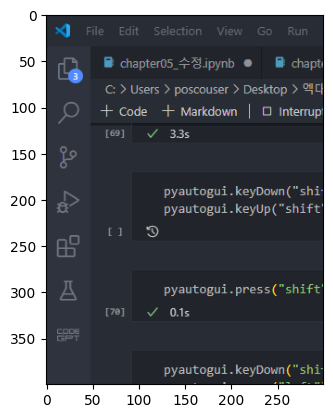

In [84]:
import matplotlib.pyplot as plt			# matplotlib 패키지 불러오기
plt.imshow(image3)						# plt.imshow() 함수로 이미지 출력하기

In [85]:
cal_key_location = pyautogui.locateOnScreen("cal_key.png")	# 이미지 좌표 출력
cal_key_location

FileNotFoundError: [Errno 2] No such file or directory: 'cal_key.png'

In [ ]:
cal_key_location.left				# 이미지의 좌측 좌표 출력

In [ ]:
pyautogui.center(cal_key_location)	# 이미지의 센터 좌표 출력

In [ ]:
cal_key_location = pyautogui.locateOnScreen("cal_key.png", grayscale = True)
cal_key_location

### [실습] 네이버 날씨 연속으로 자동 캡처 하기

In [ ]:
# 패키지 불러오기
import pyautogui		# pyautogui 패키지 불러오기
import time				# time 패키지 불러오기
import datetime			# datetime 패키지 불러오기

# 캡처 횟수 입력 받기
str_cap_num = pyautogui.prompt(text = "몇 번 캡처할지 입력해 주세요", title = "캡처 횟수", default = "")
int_cap_num = int(str_cap_num)		# 변수 int_cap_num에 캡처 횟수 저장

# 캡처 횟수 반복문 설정하기
i = 0							# 반복문 카운터로 사용할 변수 초기화
while i < int_cap_num:			# 사용자로부터 입력받은 캡처 횟수만큼 반복
    i = i + 1					# 카운터 1씩 증가

# 캡처 도구 실행하기
    pyautogui.hotkey("win", "s")	# 핫키 Win + S 실행
    time.sleep(0.5)					# 0.5초 지연
    pyautogui.write("snippingtool")	# 이미지 캡처 도구를 실행하기 위해 입력
    pyautogui.press("enter")		# Enter 키 입력
    time.sleep(1)					# 1초 지연

# 캡처 버튼 실행하기
    pyautogui.hotkey("alt", "n")
    time.sleep(1)

# 날씨 영역 캡처하기
    pyautogui.moveTo(1251, 315)		# 마우스 커서를 좌표(1251, 351)로 이동
    pyautogui.dragTo(1546, 356, duration = 2, button = "left")	# 현재 위치에서 좌표(1546, 356)까지 마우스로 드래그
    time.sleep(1)					# 1초 지연

# 현재 일시를 활용한 파일 이름 지정하기    
    now_date = datetime.datetime.now().strftime("%y%m%d_%H%M%S")
    file_name = "weather_" + now_date + ".png"		# 파일 이름 설정

# 캡처 이미지 저장하기    
    pyautogui.hotkey("ctrl", "s")	# 저장하기(Ctrl + S) 실행
    time.sleep(0.5)					# 0.5초 지연
    pyautogui.write(file_name)		# file_name의 값을 화면에 입력
    pyautogui.hotkey("alt", "s")	# 저장하기(Alt + S) 실행
    time.sleep(0.5)					# 0.5초 지연

# 캡처 도구 닫기
    pyautogui.hotkey("alt", "F")	# 파일 열기(Alt + F) 실행
    time.sleep(0.5)					# 0.5초 지연
    pyautogui.press("x")			# 끝내기(x) 실행
    time.sleep(5)					# 5초 지연

### [실습] 성적 처리 자동화

In [ ]:
# 패키지 불러오기
import pyautogui				# pyautogui 패키지 불러오기
import time						# time 패키지 불러오기
import clipboard				# 클립보드 패키지 불러오기

# 예제 파일 불러오기
time.sleep(1)
pyautogui.hotkey("win", "r")				# 윈도우의 실행 메뉴 단축키 입력
time.sleep(0.5)
pyautogui.write("c:\works\score.xlsx")		# 경로를 포함한 파일 이름 지정
pyautogui.press("enter")
pyautogui.sleep(5)

# 총점과 평균 제목 입력하기
pyautogui.hotkey("ctrl", "home")							# [A1] 셀로 위치 변경
pyautogui.press("right", presses = 4, interval = 0.1)		# 현재 위치에서 오른쪽으로 4칸 이동
clipboard.copy("총점\t평균") 								# 입력할 내용을 클립보드에 복사
time.sleep(1)
pyautogui.hotkey("ctrl", "v")								# 제목 복사
time.sleep(1)

# 총점 및 평균 계산하기
time.sleep(1)
pyautogui.press("down") 				# [E1] 셀에서 [E2] 셀로 이동

for i in range(10):
    pyautogui.write(f"=sum(B{2+i}:D{2+i})", interval=0.1)		# 총점 계산식 입력
    pyautogui.press("right")
    pyautogui.write(f"=average(B{2+i}:D{2+i})", interval=0.1)	# 평균 계산식 입력
    pyautogui.press(["enter", "left"]) 

# 셀 정렬하기  
pyautogui.hotkey("ctrl", "g")				# 엑셀의 이동 메뉴 실행
pyautogui.typewrite("a1", interval=0.1)		# [A1] 셀에 입력
pyautogui.press("enter")
time.sleep(0.5)
pyautogui.hotkey("ctrl", "a")				# 범위 지정 단축키 입력
time.sleep(0.5)
pyautogui.hotkey("alt", "h")				# [홈] 탭 실행
pyautogui.typewrite("c")					# 가운데 맞춤 실행(엑셀 2016 버전)
pyautogui.typewrite("2")

# 엑셀 2013, 2019 이후 버전에서는 가운데 맞춤 단축키가 a, c이므로
# pyautogui.typewrite("a"), pyautogui.typewrite("c") 코드를 사용하기 바랍니다.

# 표 만들기
time.sleep(0.5)
pyautogui.hotkey("ctrl", "t")				# 표 만들기 메뉴 실행
pyautogui.press("enter")					# 표 만들기 확인

# 총점 순으로 정렬하기
pyautogui.hotkey("ctrl", "g")				# 엑셀의 이동 메뉴 실행
pyautogui.typewrite("e1", interval=0.1)		# [E1] 셀에 입력
pyautogui.press("enter")					# 확인 입력
pyautogui.hotkey("alt", "a")				# 정렬 단축키 실행
pyautogui.press("s")						# 내림차순 단축키 입력
pyautogui.press("d")

# 저장 및 닫기
time.sleep(1)
pyautogui.hotkey("alt", "f2")				# 파일 저장 메뉴 불러오기
pyautogui.typewrite("score_result.xlsx", interval=0.1)		# 현재 위치에 "score_result.xlsx"로 저장
pyautogui.press("enter")
pyautogui.hotkey("alt", "f4")				# 엑셀 종료